Phys 540 project 2
<br> Andrew Koren

So, for both of these problems, or any problem with lots of matrix multiplication, a great package to pick up the work is Sympy, basically allowing for symbolic operations like Mathematica. For both of these problems, I'm going to use some Sympy code to implement each matrix.

In [1]:
from sympy import *

f, d = symbols('f d', real=True, positive=True)

Focusing = Matrix([[1,0],[-1/f,1]])
Drift = Matrix([[1,d],[0,1]])
Defocusing = Matrix([[1,0],[1/f,1]])

print('Focusing, Drift, Defocusing:')
display(Focusing, Drift, Defocusing)

print('beamline: FODO (matrix in reverse order)')
FODO = MatMul(Defocusing,Drift,Focusing,Drift, evaluate=False)
display(FODO)
display(simplify(FODO.doit()))

Focusing, Drift, Defocusing:


Matrix([
[   1, 0],
[-1/f, 1]])

Matrix([
[1, d],
[0, 1]])

Matrix([
[  1, 0],
[1/f, 1]])

beamline: FODO (matrix in reverse order)


Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1, 0],
[-1/f, 1]])*Matrix([
[1, d],
[0, 1]])

Matrix([
[(-d + f)/f,       d*(-d + 2*f)/f],
[   -d/f**2, -d**2/f**2 + d/f + 1]])

To show my work, I'll perform each matrix multiplication step-by-step using the code below:

In [2]:
def step_by_step_mul(operations: list):
    '''
    Matrix multiplication (xf) = [On,On-1,...,O2,O1](xi)
    '''
    O_r = operations[-1]
    for i in range(-1, -len(operations), -1):
            display(simplify(MatMul(*operations[0:i],O_r)))
            O_r = operations[i-1]*O_r
    result = expand(O_r)
    display(result)
    return result

result = step_by_step_mul([Defocusing,Drift,Focusing,Drift])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1, 0],
[-1/f, 1]])*Matrix([
[1, d],
[0, 1]])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[1, d],
[0, 1]])*Matrix([
[   1,          d],
[-1/f, (-d + f)/f]])

Matrix([
[  1, 0],
[1/f, 1]])*Matrix([
[(-d + f)/f, d*(-d + 2*f)/f],
[      -1/f,     (-d + f)/f]])

Matrix([
[-d/f + 1,        -d**2/f + 2*d],
[ -d/f**2, -d**2/f**2 + d/f + 1]])

<!-- For question 2, I also have code to create a twiss propogation matrix from the transfer matrix

```python

S, C, Sp, Cp = symbols('S C S\' C\' ')
M = MatrixSymbol('M',3,3)

Twiss_Propogation_Matrix = Matrix([
    [C*C, -2*S*C, S*S],
    [-C*Cp, Sp*C + S*C, -S*Sp],
    [Cp*Cp, -2*Sp*Cp, Sp*Sp]
    ])
display(Eq(M, Twiss_Propogation_Matrix))

def transfer_to_twiss(transfer_matrix):
    '''Twiss 1D Parameter Evolution Matrix'''

    [[a,b],[c,d]] = transfer_matrix.tolist()
    parameters = {
        C: a,
        S: b,
        Cp: c,
        Sp: d
        }
    result = Twiss_Propogation_Matrix.subs(parameters)
    return result

```

where
$$


    K \equiv \begin{pmatrix}
    \beta & - \alpha
\\  -\alpha & \gamma
\end{pmatrix}
\\  K = M K_0 M^T
$$ -->


For consistency, I'll use:
- lower case for symbols
- upper case for specific matricies
- focusing/defocusing strength $f$ will be strictly positive.

----

1. Telescopic system. 
- the transfer matrix in the $x$-plane is

In [3]:
f_1, f_2 = symbols('f_1 f_2', real=True, positive=True)

F1 = Focusing.replace(f, f_1)
F2 = Focusing.replace(f, f_2)
O1 = Drift.replace(d,f_1)
O2 = Drift.replace(d,f_2)


Telescope = [O2,F2,O2,O1,F1,O1]
Transfer_x = step_by_step_mul(Telescope)

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_1, 1]])*Matrix([
[1, f_1],
[0,   1]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[     1, f_1],
[-1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     0, f_1],
[-1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[     1, 0],
[-1/f_2, 1]])*Matrix([
[-f_2/f_1, f_1],
[  -1/f_1,   0]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[-f_2/f_1,      f_1],
[       0, -f_1/f_2]])

Matrix([
[-f_2/f_1,        0],
[       0, -f_1/f_2]])

This yields both $\langle x | x' \rangle = 0$ and $\langle x'|x \rangle=0$, so the system is both imaging and telescoping in the x-plane. However, for the y-plane, we have

In [4]:
# the 'focusing' magnets have a defocusing effect on y
# I still call them F1, F2 for consistency
F1_y = F1.subs(f_1,-f_1)
F2_y = F2.subs(f_2,-f_2)

Telescope = [O2,F2_y,O2,O1,F1_y,O1] 
Transfer_y = step_by_step_mul(Telescope)

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[    1, 0],
[1/f_1, 1]])*Matrix([
[1, f_1],
[0,   1]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[1, f_1],
[0,   1]])*Matrix([
[    1, f_1],
[1/f_1,   2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    2, 3*f_1],
[1/f_1,     2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[    1, 0],
[1/f_2, 1]])*Matrix([
[2 + f_2/f_1, 3*f_1 + 2*f_2],
[      1/f_1,             2]])

Matrix([
[1, f_2],
[0,   1]])*Matrix([
[  2 + f_2/f_1, 3*f_1 + 2*f_2],
[2/f_2 + 2/f_1, 3*f_1/f_2 + 4]])

Matrix([
[4 + 3*f_2/f_1, 6*f_1 + 6*f_2],
[2/f_2 + 2/f_1, 3*f_1/f_2 + 4]])

which explains why the system does not work in the y-plane

- Now we'll use $K=M K_0 M^T$ to find $\alpha$ and $\beta$ at position $x_1$ and $x_2$

$$
    K \equiv \begin{pmatrix}
    \beta & - \alpha
\\  -\alpha & \gamma
\end{pmatrix}
$$

<!-- alpha_1, alpha_2, beta_1, beta_2, gamma_1, gamma_2 = symbols('alpha_(1:3) beta_(1:3) gamma_(1:3)')

K_1 = Matrix([
    [beta_1, -alpha_1],
    [-alpha_1, gamma_1]
    ])
K_2 = Matrix([
    [beta_2, -alpha_2],
    [-alpha_2, gamma_2]
    ])

K_1f = simplify(expand(Transfer_x * K_1 * Transfer_x.T))
K_2f = simplify(expand(Transfer_y * K_2 * Transfer_y.T))

display(K_1f, K_2f) -->

In [5]:
alpha_1, alpha_2, beta_1, beta_2, gamma_1, gamma_2 = symbols('alpha_(1:3) beta_(1:3) gamma_(1:3)', real=True)

K1 = Matrix([
    [beta_1, -alpha_1],
    [-alpha_1, gamma_1]
    ])
K2 = Matrix([
    [beta_2, -alpha_2],
    [-alpha_2, gamma_2]
    ])

Eq(K2, Transfer_x*K1*Transfer_x.T)


Eq(Matrix([
[  beta_2, -alpha_2],
[-alpha_2,  gamma_2]]), Matrix([
[beta_1*f_2**2/f_1**2,              -alpha_1],
[            -alpha_1, f_1**2*gamma_1/f_2**2]]))

Element-by-element, we see $\alpha$ is unchanged, while $\beta$ is scaled by ${f_2^2 \over f_1^2}$

- For phase advance, we'll use
$$
\begin{array}
\\     \cos \Delta \psi 
    = {\langle x|x\rangle \beta_1 - \langle x|x'\rangle\alpha_1 \over \sqrt{\beta_1 \beta_2}}
\\    \sin \Delta \psi
    = {\langle x|x'\rangle \over \sqrt{\beta_1 \beta_2}}
\end{array}
$$

In [6]:
[a, b], [_, _] = Transfer_x.tolist()
beta_2 = beta_1 * f_2*f_2 / (f_1*f_1)

cos_dpsi = expand((a*beta_1 - b * alpha_1)/(sqrt(beta_1*beta_2)))
sin_dpsi = expand(b/sqrt(beta_1*beta_2))
display(cos_dpsi, sin_dpsi)

-beta_1/Abs(beta_1)

0

The cosine term reduces down to $\cos^{-1}(-1)=\pi$ in agreement with the sine term. Note that $-\pi$ phase advance is the same as $\pi$ phase advance.

- For telescoping in both planes, we'll need defocusing as well as focusing, with less obvious distances. I'm quite lazy, so I've copied the diagram from class below

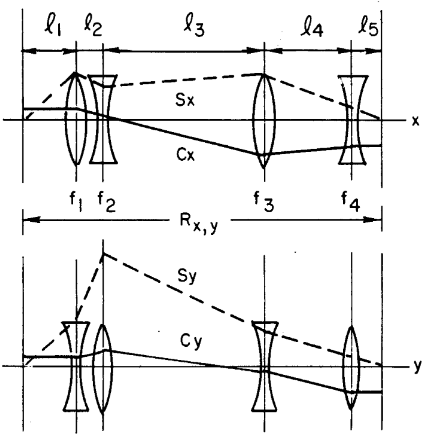

It isn't actually too hard to find the distance/strength relations, we need only find the transfer matricies for both planes and compute when $\langle x' | x \rangle = \langle y' | y \rangle = 0$. Let's make use of those tensor products now

In [7]:
from sympy.physics.quantum import TensorProduct


l_1, l_2, l_3, l_4, l_5, f_3, f_4 = symbols('l_(1:6) f_3 f_4', real=True, positive=True)

TO1 = TensorProduct(eye(2),Drift.subs(d,l_1))
TO2 = TensorProduct(eye(2),Drift.subs(d,l_2))
TO3 = TensorProduct(eye(2),Drift.subs(d,l_3))
TO4 = TensorProduct(eye(2),Drift.subs(d,l_4))
TO5 = TensorProduct(eye(2),Drift.subs(d,l_5))

TF1 = Matrix([
    [F1, zeros(2,2)],
    [zeros(2,2), F1_y]
    ])
TD2 = TF1.replace(f_1, -f_2)
TF3 = TF1.replace(f_1,  f_3)
TD4 = TF1.replace(f_1, -f_4)

display(TO1)
display(TF1)
display(TD2)

Telescope_2D = [TO5, TD4, TO4, TF3, TO3, TD2, TO2, TF1, TO1]


Matrix([
[1, l_1, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_1],
[0,   0, 0,   1]])

Matrix([
[     1, 0,     0, 0],
[-1/f_1, 1,     0, 0],
[     0, 0,     1, 0],
[     0, 0, 1/f_1, 1]])

Matrix([
[    1, 0,      0, 0],
[1/f_2, 1,      0, 0],
[    0, 0,      1, 0],
[    0, 0, -1/f_2, 1]])

Assembling according to the diagram yields

In [8]:
Telescope_2D = [TO5, TD4, TO4, TF3, TO3, TD2, TO2, TF1, TO1]


# simplify(step_by_step_mul(Telescope_2D))
Transfer_xy = simplify(MatMul(*Telescope_2D)) # too big either way

display(Transfer_xy) 
Transfer_xy = Transfer_xy.doit()

Matrix([
[1, l_5, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_5],
[0,   0, 0,   1]])*Matrix([
[    1, 0,      0, 0],
[1/f_4, 1,      0, 0],
[    0, 0,      1, 0],
[    0, 0, -1/f_4, 1]])*Matrix([
[1, l_4, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_4],
[0,   0, 0,   1]])*Matrix([
[     1, 0,     0, 0],
[-1/f_3, 1,     0, 0],
[     0, 0,     1, 0],
[     0, 0, 1/f_3, 1]])*Matrix([
[1, l_3, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_3],
[0,   0, 0,   1]])*Matrix([
[    1, 0,      0, 0],
[1/f_2, 1,      0, 0],
[    0, 0,      1, 0],
[    0, 0, -1/f_2, 1]])*Matrix([
[1, l_2, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_2],
[0,   0, 0,   1]])*Matrix([
[     1, 0,     0, 0],
[-1/f_1, 1,     0, 0],
[     0, 0,     1, 0],
[     0, 0, 1/f_1, 1]])*Matrix([
[1, l_1, 0,   0],
[0,   1, 0,   0],
[0,   0, 1, l_1],
[0,   0, 0,   1]])

Which is so big it goes off the screen. I'll hack away at the four parameters one-by-one, since sympy will have trouble with $8$ parameters simultaneously.



In [10]:
m12 = Transfer_xy[0,1]
m21 = Transfer_xy[1,0]
m34 = Transfer_xy[2,3]
m43 = Transfer_xy[3,2]

def update_target_registry(registry_dict, new_key, target):
    registry_dict[new_key] = target
    for key in registry_dict:
        registry_dict[key] = registry_dict[key].subs(new_key, target)

l_3_target = solve(m12, l_3)[0].simplify()
sol_registry = {l_3: l_3_target}

l_2_target = solve(m21.subs(sol_registry), l_2)[0]
update_target_registry(sol_registry, l_2, l_2_target)

# my laptop couldn't compute three terms by force
#f_1_target = solve(m34.subs(sol_registry), f_1)[0]
#update_target_registry(sol_registry, f_1, f_1_target) 



That did not work after 10 minutes, and I have 6 more terms to compute, so no luck there. Let's try to make use of the fact that we know what the answer should be.

$$
\begin{pmatrix}
    - m_x & 0              & 0 & 0
\\      0 & -{1 \over m_x} & 0 & 0
\\      0 & 0              & - m_y & 0
\\      0 & 0              &  0 & -{1 \over m_y} 
\end{pmatrix}
$$

Which gives ${M_{11}\over M_{22}}= m_x^2$ and ${M_{33} \over M_{44}} = m_y^2$
. Can sympy handle this a bit better? Not really. But, we can look at the system as two doublets and see if there's any more apparent ideas

In [25]:
Doublet_1 = [TO3.subs(l_3,l_3/2), TD2, TO2, TF1, TO1]
Doublet_2 = [TO5, TD4, TO4, TF3, TO3.subs(l_3,l_3/2)]


MatMul(MatMul(*Doublet_2).doit().expand(),MatMul(*Doublet_1).doit().expand())

Matrix([
[1 + l_5/f_4 - l_4/f_3 - l_5/f_3 - l_4*l_5/(f_3*f_4), l_3/2 + l_4 + l_5 + l_3*l_5/(2*f_4) + l_4*l_5/f_4 - l_3*l_4/(2*f_3) - l_3*l_5/(2*f_3) - l_3*l_4*l_5/(2*f_3*f_4),                                                   0,                                                                                                               0],
[                      1/f_4 - 1/f_3 - l_4/(f_3*f_4),                                                   1 + l_3/(2*f_4) + l_4/f_4 - l_3/(2*f_3) - l_3*l_4/(2*f_3*f_4),                                                   0,                                                                                                               0],
[                                                  0,                                                                                                               0, 1 - l_5/f_4 + l_4/f_3 + l_5/f_3 - l_4*l_5/(f_3*f_4), l_3/2 + l_4 + l_5 - l_3*l_5/(2*f_4) - l_4*l_5/f_4 + l_3*l_4/(2*f_3) + l_3*l_5/(2*f_3) - l_3*l_4*l_5/(2*

----

2. We can do this pretty easily with sympy again. We already know a lot about our transfer matrix from the general equation

$$
M = \begin{pmatrix}
    \sqrt{\beta_2 \over \beta_1} \left(\cos \mu + \alpha_1 \sin \mu \right)
&   \sqrt{\beta_1 \beta_2} \sin \mu
\\  -{1 + \alpha_1\alpha_2 \over \sqrt{\beta_1 \beta_2}} \sin \mu 
    - {\alpha_2 - \alpha_1 \over \sqrt{\beta_1 \beta_2}} \cos \mu
&   \sqrt{\beta_2 \over \beta_1} \left( \cos \mu - \alpha_1 \sin \mu \right)
\end{pmatrix}
$$

For $\mu = {\pi \over 2}$ this gives

$$
M = \begin{pmatrix}
    \sqrt{\beta_2 \over \beta_1} \alpha_1 
&   \sqrt{\beta_1 \beta_2} 
\\  -{1 + \alpha_1\alpha_2 \over \sqrt{\beta_1 \beta_2}} 
&   -\alpha_1 \sqrt{\beta_2 \over \beta_1}
\end{pmatrix}
$$

Following our discussion in class, we're going to use $f = {l \over \sqrt{2}}$ to support our quarter-wave requirement

In [36]:
l, q1, q2 = symbols('l Q1 Q2', real=True, positive=True)
beta_1, beta_2, gamma_1, gamma_2, alpha_1, alpha_2 = symbols('beta_1 beta_2 gamma_1 gamma_2 alpha_1 alpha_2', real=True)

L12 = Drift.replace(d, l/2)
L = Drift.replace(d,l)
F = Focusing.subs(f, l/sqrt(2))
D = Defocusing.subs(f, l/sqrt(2))
Q1 = Defocusing.subs(f, q1)
Q2 = Focusing.subs(f, q2)

# should we keep f = l/sqrt(2)? Yep, garuntees µ=π/2
Elements = [Q2,L12,D,L,F,L12,Q1] 

Beam_Line = step_by_step_mul(Elements)

Quarter_Wave = Matrix([
    [sqrt(beta_2/beta_1)*alpha_1, sqrt(beta_1*beta_2)]
])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[         1, 0],
[-sqrt(2)/l, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[   1, 0],
[1/Q1, 1]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[         1, 0],
[-sqrt(2)/l, 1]])*Matrix([
[(Q1 + l/2)/Q1, l/2],
[         1/Q1,   1]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[1, l],
[0, 1]])*Matrix([
[                      (Q1 + l/2)/Q1,           l/2],
[(2*l - sqrt(2)*(2*Q1 + l))/(2*Q1*l), 1 - sqrt(2)/2]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[        1, 0],
[sqrt(2)/l, 1]])*Matrix([
[(2*Q1 + 3*l - sqrt(2)*(2*Q1 + l))/(2*Q1), l*(3 - sqrt(2))/2],
[     (2*l - sqrt(2)*(2*Q1 + l))/(2*Q1*l),     1 - sqrt(2)/2]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[1, l/2],
[0,   1]])*Matrix([
[(2*Q1 + 3*l - sqrt(2)*(2*Q1 + l))/(2*Q1), l*(3 - sqrt(2))/2],
[                       -2/l + sqrt(2)/Q1,           sqrt(2)]])

Matrix([
[    1, 0],
[-1/Q2, 1]])*Matrix([
[-sqrt(2) + 3*l/(2*Q1),   3*l/2],
[    -2/l + sqrt(2)/Q1, sqrt(2)]])

Matrix([
[                         -sqrt(2) + 3*l/(2*Q1),                3*l/2],
[-2/l + sqrt(2)/Q2 + sqrt(2)/Q1 - 3*l/(2*Q1*Q2), sqrt(2) - 3*l/(2*Q2)]])

This matrix isn't super simple, but the top-right term is useful

$$
{3 l \over 2} = \sqrt{\beta_1 \beta_2}
$$

<!-- We also need quarter-wave phase advance $\Delta \mu = {\pi \over 2}$. 

$$
    \Delta \psi = {\pi \over 2}
\\  \sqrt{\beta_1\beta_2} = {3 l \over 2}
\\  l = {2 \over 3} \sqrt{\beta_1 \beta_2}
$$

$$
\\  {3l \over 2Q_1} -\sqrt{2} -{3 l \alpha_1 \over 2} = 0
\\  {\sqrt{\beta_1 \beta_2} \over Q_1} = \alpha_1 \sqrt{\beta_1 \beta_2} + \sqrt{2}
\\  Q_1 = \frac{\sqrt{\beta_1 \beta_2}}{\alpha_1 \sqrt{\beta_1 \beta_2} + \sqrt{2}}
$$
We've already got $l$ and $Q_1$ taken care of. --> 

To get $Q_1$ and $Q_2$, I was planning to use $K_2 = M K_1 M^T$, but I have some nice code to compute the Twiss Transfer matrix that I want to try out. This allows us to compute

$$
    \begin{pmatrix} \beta_2 \\ \alpha_2 \\ \gamma_2 \end{pmatrix} 
    = M_{TWISS}  \begin{pmatrix} \beta_1 \\ \alpha_1 \\ \gamma_1 \end{pmatrix} 
$$

In [27]:
s, c, sp, cp = symbols('S C S\' C\' ')
M = MatrixSymbol('M_TWISS',3,3)

Twiss_Propogation_Matrix = Matrix([
    [c*c, -2*s*c, s*s],
    [-c*cp, sp*c + s*s, -s*sp],
    [cp*cp, -2*sp*cp, sp*sp]
    ])
display(Eq(M, Twiss_Propogation_Matrix))

def transfer_to_twiss(Transfer_Matrix):
    '''Twiss 1D Parameter Evolution Matrix'''

    [[a,b],[cee,d]] = Transfer_Matrix.tolist()
    parameters = {
        c: a,
        s: b,
        cp: cee,
        sp: d
        }
    Result = Twiss_Propogation_Matrix.subs(parameters)
    return Result

Eq(M_TWISS, Matrix([
[ C**2,      -2*C*S,  S**2],
[-C*C', C*S' + S**2, -S*S'],
[C'**2,    -2*C'*S', S'**2]]))

---

For plotting, we could go one-by-one and find the twiss parameters after each element, but I think this is a great time to try out PyTao. Pytao is just a wrapper of Tao, but it's great for making really simple plots like alpha/beta plots inside of a jupyter notebook. I'm running this notebook within my WSL since it requires a Tao installation.

In [ ]:
# conda install -c conda-forge pytao

Lets create a init file and lattice before starting up Tao.

In [ ]:
def make_lattice(params):
    k_Q1 = float(q1_particular.subs(params).evalf())
    k_Q2 = float(q2_particular.subs(params).evalf())
    k_f  = params[l]/(2**(1/2))
    
    lat_text = f"""\
! lattice setup
beginning[alpha_a] = {params[alpha_1]}.   ! m  a-mode alpha function
beginning[alpha_b] = {params[alpha_1]}.   ! m  b-mode = a-mode

beginning[beta_a] = {params[beta_1]}.     ! m  a-mode beta  function
beginning[beta_b] = {params[beta_1]}.     ! m  b-mode = a-mode

beginning[e_tot] = 10e6   ! eV

parameter[geometry] = open

L: drift, L = {params[l]}
L2: drift, L = {params[l]/2}
Q1: quadrupole, L = 0.5, k1 = {-k_Q1}
Q2: quadrupole, L = 0.5, k1 = { k_Q2}
F:  quadrupole, L = 0.5, k1 = { k_f}
D:  quadrupole, L = 0.5, k1 = {-k_f}

lat: line = (Q1, L2, F, L, D, L2, Q2)     ! Start to finish
use, lat                    

"""

    with open('QuarterWave.bmad', 'w') as f:
        f.write(lat_text)

def make_init():
    init_text = f"""\
&tao_design_lattice
  n_universes = 1
  design_lattice(1)%file = "QuarterWave.bmad"
/

&tao_plot_page
  plot_page%size = 500, 500
  place(1) = 'r12', 'alpha'
  place(2) = 'r22', 'beta'
/
"""
    with open('tao.init', 'w') as f:
        f.write(init_text)

make_lattice(params)
make_init()

Now we can make our plots using the paramaters we found through sympy

In [ ]:
from pytao import Tao
import matplotlib.pyplot as plt
from pathlib import Path 

In [ ]:
init_file = Path.cwd() / "tao.init" # make sure Path.cwd() is this directory
tao = Tao(init_file=init_file, plot="mpl")
tao.show('lat')

In [ ]:
tao.plot(["alpha", "beta"])

Well, that isn't what we were looking for. Our calculations assume a thin-lens approximation, but these are clearly not thin. There's also the issue that our drift lengths, which should be exact to keep $\beta_x=\beta_y$. The two $\beta$'s appear to be offset at the first focus, and the two $\alpha$'s at the second.

In [ ]:
%%tao
set ele Quadrupole::* l = 0.05
show lat
scale

In [ ]:
tao.plot(["alpha", "beta"])

Not as terrible, but still nowhere near design. I'm not quite sure where $Q2$ is, but `show lat` suggests it is there. Let's try zero thickness

In [ ]:
%%tao
set ele quad::* l = 0.0
show lat
scale

In [ ]:
tao.plot(["alpha", "beta"])